# Insertion Sort

Import itertools to generate *permutations* on lists, random to generate the test sets for the *time complexity analysis* and numpy to have available useful mathematical functions. Also, pandas and matplotlib was imported to plot the data in experiments.

In [7]:
%matplotlib inline
import itertools as it
import numpy as np
import random as rnd
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import timeit as ti

Implementation of Insertion Sort Algorithm.

In [8]:
def insertion_sort(arr):    
    for j in range(1, len(arr)):
        x = arr[j]
        i = j - 1
        while(i >= 0 and arr[i] >= x):
            arr[i + 1] = arr[i]
            i = i - 1
            
        arr[i + 1] = x
    return arr
    
def insertion_sort_count(arr):
    lines, comparisions, swaps, querys = [0]*4
    
    for j in range(1, len(arr)):
        lines += 3
        comparisions += 1
        i = j - 1
        x = arr[j]
        while(arr[i] >= x and i >= 0):
            querys += 1
            comparisions += 3
            lines +=3
            arr[i + 1] = arr[i]
            swaps += 1
            i = i - 1
        lines += 1
        swaps += 1
        arr[i + 1] = x    
    lines +=2
    return (lines, comparisions, swaps, querys)

Test the algorithm with a test array ([1,2,3,4,5]) and all its permutations and check the results.

In [9]:
sorted_array = [1,2,3,4,5]
test = list(it.permutations(sorted_array))
test_passed = True

for i in range(len(test)):
    if sorted_array != insertion_sort(list(test[i])):
        test_passed = False
        break;
        
if(test_passed):
    print ("Insertion sort works good")
else:
    print ("Wrong Answer in insertion sort")

Insertion sort works good


## Time complexity

Recursive function that generates all permutations of an array or list and returns the result in the list *r*. This code was based in a code of Daniel Jimenez from his 1998 algorithms class at The University of Texas at San Antonio now his in Rutgers University. [The code is available here](http://camino.rutgers.edu/ut/utsa/cs3343/index.html)

In [10]:
def swap (v, i, j):
    v[i], v[j] = v[j], v[i]
    return v

def perm(v, i, n, r):
    j, k, l = [0]*3
    if i == n :
        r.append(v.copy())
        
    else:
        for j in range(i,n):
            swap (v, i, j);
            perm (v, i + 1, n, r);
            swap (v, i, j)

Now, the ***itertool.permutations*** and ***perm*** functions will be tested for large values to see your performance in time and memory usage.

In [11]:
n = 11
testing_array = list(rnd.sample(range(1000), n))
res = []
#perm(testing_array, 0, len(testing_array), res)
#print(res[len(res) - 1])

print(testing_array)
time_r1 = ti.timeit("list(permutations("+ str(testing_array) + "))", number = 2, setup="from itertools import permutations")
time_r2 = ti.timeit("perm("+ str(testing_array) + ", 0, " + str(len(testing_array)) + ",[])", number = 2, setup="from __main__ import perm")
print("Time itertools: ", time_r1, " - Time perm:", time_r2)

[294, 885, 566, 403, 292, 426, 660, 618, 864, 614, 659]


Time itertools:  19.890257520000887  - Time perm: 218.1195765270022


The permutation do $n!$ operations, so for $n = 12$ the machine will have to find $479001600$ permutations. It isn't possible to obtain the time for the function for this value with *timeit* because when you try it, you will get an error message related with lack of memory.  
For both functions, de average time of execution is above. The function in *itertools* is 23 times more fast, approximately, than the recursive function of Daniel Jimenez.

Now, a count of the operations within the Insertion Sort will be done, taking all the permutations of a random array with size $n$. The operations to be counted will be: the number of lines executed, the comparisions, swaps and queries within the While Loop. With this information a histogram will be displayed where the distribution of the data set and the average values can be observed.

In [12]:
n = 5
base_array = list(rnd.sample(range(1000), n))
permutations = list(it.permutations(base_array))

results = []
for i in range(len(permutations)):
    results.append(list(insertion_sort_count(list(permutations[i]))))

results = pd.DataFrame(results, columns=['Lines','Comparisions','Swaps','Querys'])
print("Averages")
display(results.mean())

Averages


Lines           33
Comparisions    19
Swaps            9
Querys           5
dtype: float64

<Figure size 432x288 with 0 Axes>

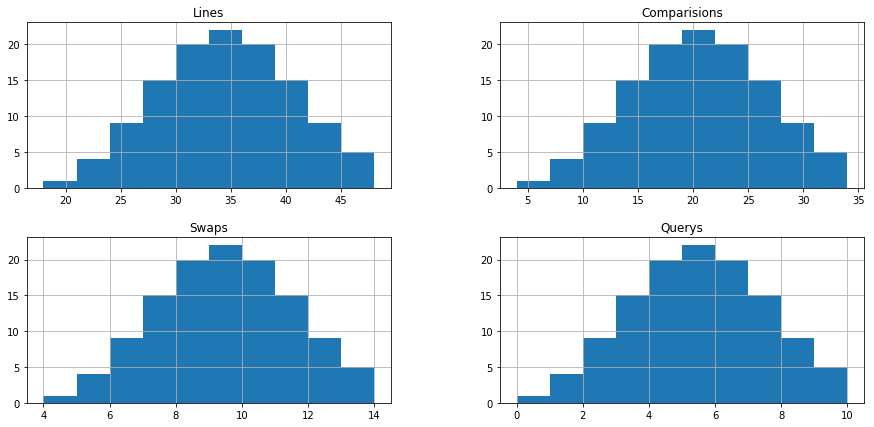

In [13]:
plt.figure()
fig, axes = plt.subplots(2,2,figsize=(15,7))
results.hist(ax = axes[0,0], column='Lines', grid=True)
results.hist(ax = axes[0,1], column='Comparisions')
results.hist(ax = axes[1,0], column='Swaps')
results.hist(ax = axes[1,1], column='Querys')
plt.show()